# Introduction

In the following notebook, I will be performing an EDA of Airbnb data in the San Francisco area. This data pertains to the last calendar year, which at the time of this analysis would from December 2018 through December 2019.

*GitHub Repo References*
The raw data files can be found [here](https://github.com/KishenSharma6/practice/tree/master/Data/01_Raw/SF%20Airbnb%20Raw%20Data).

The raw data aggregation script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/01.%20Raw%20Data%20Aggregation%20Scripts/2020_0129_Airbnb_Raw_Data_Aggregation.ipynb).

The data cleaning script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/02.%20Data%20Cleaning%20Scripts/2020_0130_Listings_Cleaning.ipynb).

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [1]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [2]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#list columns with date information to parse
dates = ['first_review', 'host_since', 'last_review']

#Read listings Data
df = pd.read_csv(path + '2020_0201_Listings_Cleaned.csv',index_col=0, low_memory=False, 
                 dtype={'review_scores_accuracy':'object',
                              'review_scores_checkin':'object',
                              'review_scores_cleanliness':'object',
                              'review_scores_communication':'object',
                              'review_scores_location':'object',
                             'review_scores_value':'object'} ,
                      sep=',', parse_dates=dates)

**Set notebook preferences**

In [3]:
#Set pandas options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:.0f}'.format

#Set plot aesthetics
plt.style.use('ggplot')

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

## Data Preview

In [4]:
#Preview data
print('Listings shape:', df.shape)
display(df.head())

Listings shape: (98781, 70)


,access,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,state,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0,77,1,Real Bed,1,2,1,0,0,1 week ago,moderate,San Francisco,100,New update: the house next door is under const...,25,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,True,1169,True,True,1,"San Francisco, California, United States",Holly,Duboce Triangle,100,within an hour,2008-07-31,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,True,A family of 4 lives upstairs with their dog. N...,True,2019-03-16,38,STR-0001256,-122,30,1,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,183,51,170,Apartment,False,False,True,10,10,10,10,10,97,10,2,Entire home/apt,100,"Newly remodeled, modern, and bright garden uni...",CA,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
1,"Our deck, garden, gourmet kitchen and extensiv...",5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0,0,1,Real Bed,2,3,1,0,0,4 months ago,strict_14_with_grace_period,San Francisco,100,We live in a large Victorian house on a quiet ...,0,2009-05-03,2,Philip: English transplant to the Bay Area and...,True,8904,True,False,2,"San Francisco, California, United States",Philip And Tania,Bernal Heights,80,within a day,2009-03-02,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Please respect the house, the art work, the fu...",5858,False,Unavailable,True,2017-08-06,38,Unavailable,-122,60,30,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235,Apartment,False,False,True,10,10,10,10,10,98,9,1,Entire home/apt,250,We live in a large Victorian house on a quiet ...,CA,Unavailable,The train is two blocks away and you can stop ...,94110
2,Unavailable,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30,365,4,Real Bed,1,1,9,9,0,17 months ago,strict_14_with_grace_period,San Francisco,50,Nice and good public transportation. 7 minute...,12,2009-08-31,1,7 minutes walk to UCSF. 15 minutes walk to US...,True,21994,True,False,10,"San Francisco, California, United States",Aaron,Cole Valley,100,within a few hours,2009-06-17,"['email', 'phone', 'reviews', 'jumio', 'govern...","No party, No smoking, not for any kinds of smo...",7918,False,Unavailable,True,2016-11-21,38,Unavailable,-122,60,32,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,Please email your picture id with print name (...,17,0,65,Apartment,False,False,True,8,9,8,9,9,85,8,0,Private room,200,Room rental-sunny view room/sink/Wi Fi (inner ...,CA,Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,94117
3,Unavailable,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30,365,

In [5]:
#View data types
df.dtypes

access                                      object
accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Exploratory Data Analysis

## Target variable values of interest

**Review Scores Rating**

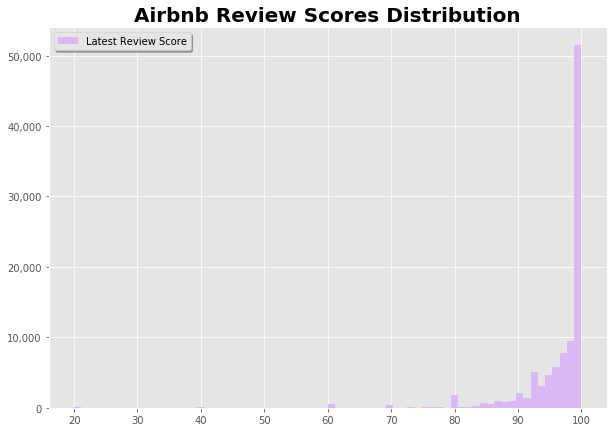

In [6]:
#plot hist
g =df.review_scores_rating.hist(figsize=(10,7), bins = 70,color = '#dab8f3', label = 'Latest Review Score')

#Set font dictionaries
dict_title= {'fontweight' : 'heavy', 'fontsize' : 20}

#Set plot aesthetics
g.set_title('Airbnb Review Scores Distribution', fontdict=dict_title)
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
g.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)

**Listing Price**

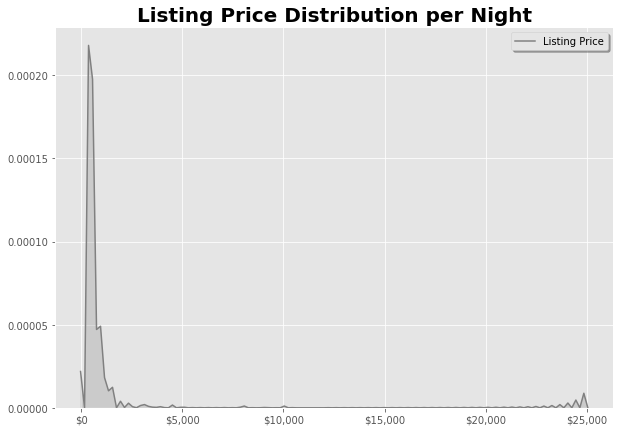

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

#KDE
j = sns.kdeplot(df.price, shade=True, color="grey",ax=ax, label = 'Listing Price')

#Set plot aesthetics
j.set_title('Listing Price Distribution per Night', fontdict =dict_title)
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)

### Different relationships with price

**Prices across San Francisco**

In [8]:
#Import geopandas to plot lat, long data
import geopandas as gpd


#Read in Airbnb neighborhoods data
fname = r"C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\References/Airbnb Neighbourhoods.geojson"

#load geojson filt into a pandas df
neighborhoods = gpd.read_file(fname)


#Sort and view neighborhoods
neighborhoods.sort_values(by = 'neighbourhood', inplace=True)

display(neighborhoods)

,neighbourhood,neighbourhood_group,geometry
20,Bayview,None,"(POLYGON ((-122.388108 37.747803, -122.3881 37..."
29,Bernal Heights,None,"(POLYGON ((-122.428255 37.731785, -122.428147 ..."
27,Castro/Upper Market,None,"(POLYGON ((-122.446438 37.761036, -122.446408 ..."
30,Chinatown,None,"(POLYGON ((-122.408767 37.790163, -122.408797 ..."
11,Crocker Amazon,None,"(POLYGON ((-122.42085 37.708335, -122.423878 3..."
4,Diamond Heights,None,"(POLYGON ((-122.435527 37.74146, -122.435632 3..."
3,Downtown/Civic Center,None,"(POLYGON ((-122.408912 37.790132, -122.408797 ..."
12,Excelsior,None,"(POLYGON ((-122.440824 37.716455, -122.438284 ..."
14,Financial District,None,"(POLYGON ((-122.394252 37.800074, -122.394244 ..."
25,Glen Park,None,"(POLYGON ((-122.424183 37.742262, -122.423941 ..."


In [9]:
neighborhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean().values


,neighbourhood,neighbourhood_group,geometry,avg_price
20,Bayview,None,"(POLYGON ((-122.388108 37.747803, -122.3881 37...",122
29,Bernal Heights,None,"(POLYGON ((-122.428255 37.731785, -122.428147 ...",187
27,Castro/Upper Market,None,"(POLYGON ((-122.446438 37.761036, -122.446408 ...",243
30,Chinatown,None,"(POLYGON ((-122.408767 37.790163, -122.408797 ...",186
11,Crocker Amazon,None,"(POLYGON ((-122.42085 37.708335, -122.423878 3...",117
4,Diamond Heights,None,"(POLYGON ((-122.435527 37.74146, -122.435632 3...",279
3,Downtown/Civic Center,None,"(POLYGON ((-122.408912 37.790132, -122.408797 ...",179
12,Excelsior,None,"(POLYGON ((-122.440824 37.716455, -122.438284 ...",125
14,Financial District,None,"(POLYGON ((-122.394252 37.800074, -122.394244 ...",240
25,Glen Park,None,"(POLYGON ((-122.424183 37.742262, -122.423941 ...",214


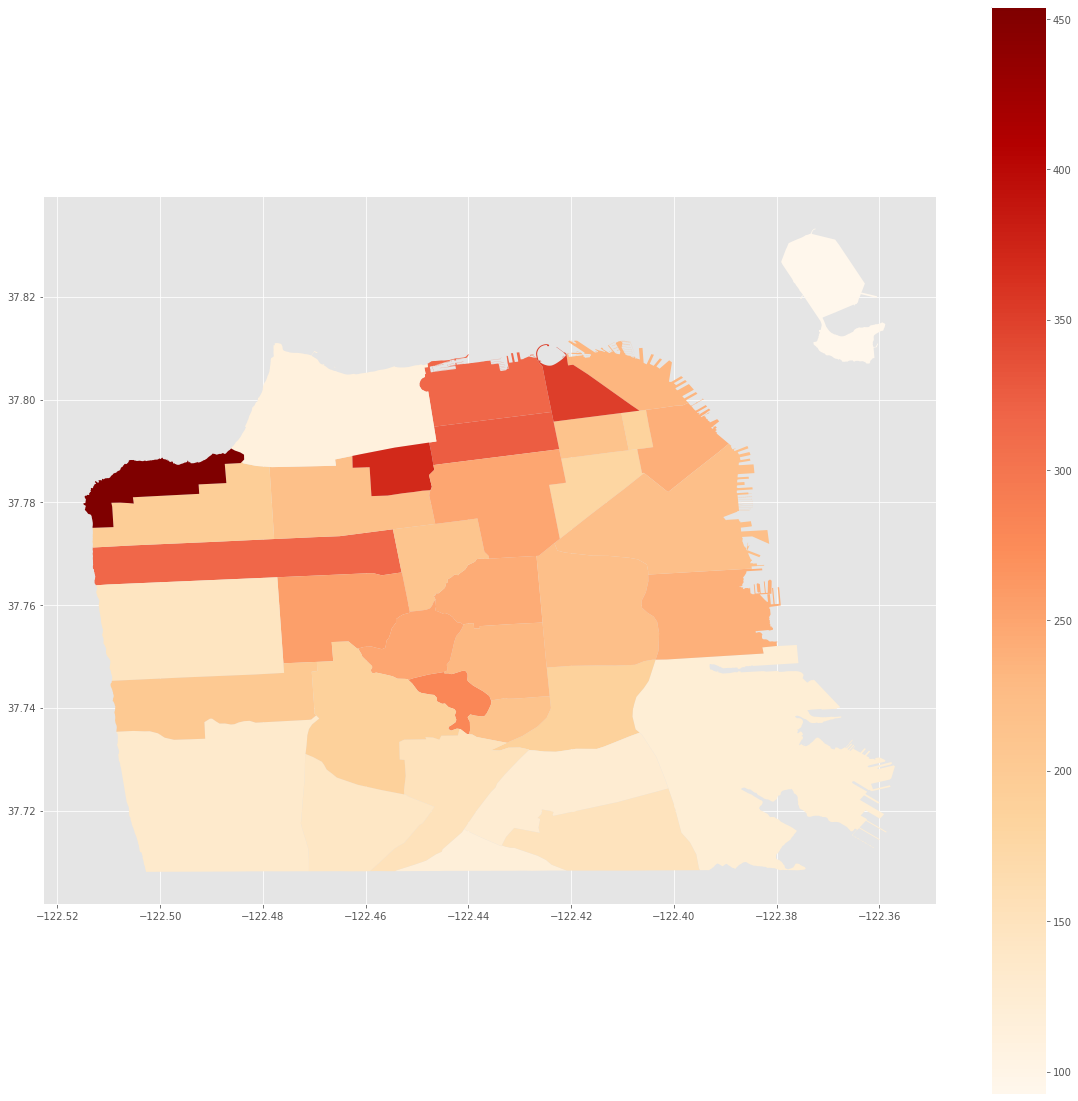

In [10]:
#Plot geodata
neighborhoods.plot(column ='avg_price', legend = True,cmap='OrRd',
                      legend_kwds={'label': "Average price per night"},figsize=(20,20))

#figure out how to plot neighborhood names
#maybe also split this alongside average review score(maybe save for nlp)

**Prices by property type**


Mean/median prices by property type

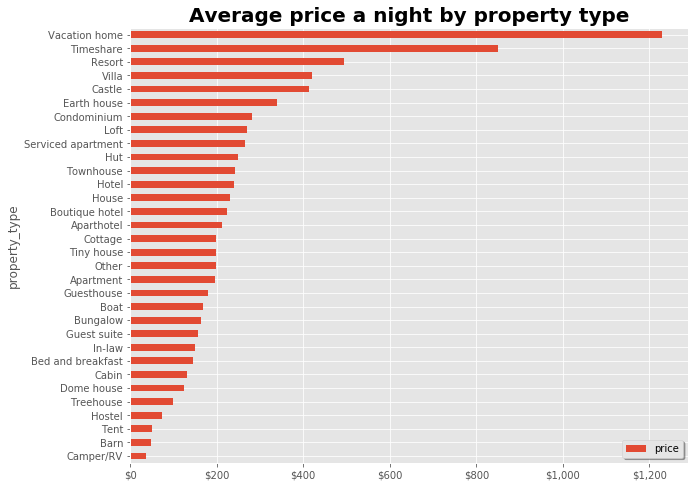

In [29]:
#Set 538 plot style
plt.style.use('ggplot')

#Counts of property types
prop_mean = df.groupby('property_type')['price'].mean().sort_values(ascending = False).reset_index()

g = prop_mean.plot(x = 'property_type', y = 'price', kind = 'barh',
                  figsize = (10,8))
g.set_title('Average price a night by property type',fontdict= dict_title )

g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)
g.invert_yaxis()

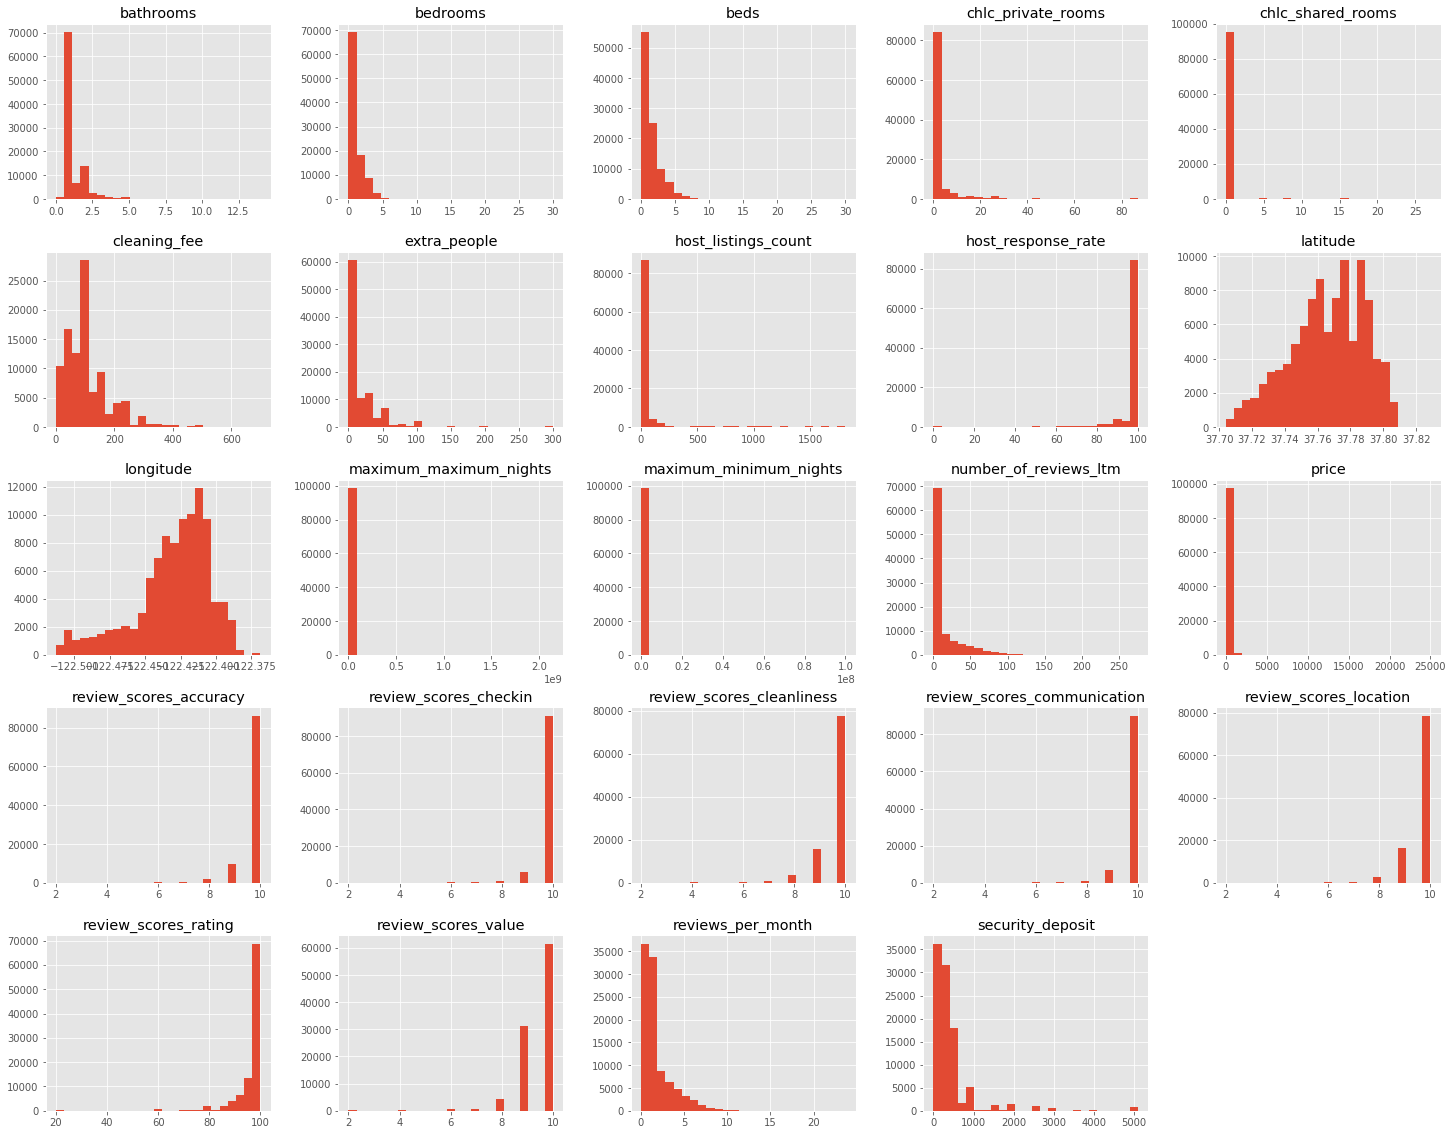

In [43]:
#Capture floats from df
floats = df.select_dtypes(include = 'float64')

floats[-['latitude', 'longitude']]
#.hist(figsize = (25,20), bins = 25);

In [ ]:
df[[]]

In [ ]:
sns.pairplot(df, hue = 'continent')


#Superhost?

Explore what makes a super host.
Why would you want to be a super host
What advantages can you find to being a super host? (higher reviews, higher rent, more business?)

In [16]:
len(df[df.host_is_superhost == False])

58152

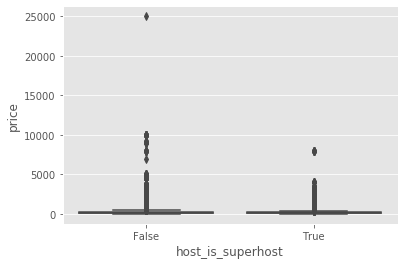

In [17]:
#Add values
sns.boxplot( x = 'host_is_superhost', y='price', data = df)

Who owns the most Airbnb properties?

https://towardsdatascience.com/airbnb-rental-listings-dataset-mining-f972ed08ddec

In [18]:
len(df[df.host_is_superhost == False])

58152

When is the cheapest days for travel? How do prices compare during holiday>

### Different relationships with review_scores_rating